# Homework Stage 10a: Linear Regression

Note: I use the data-set provided in the starter because my project's dataset does not fit for Linear Regression

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

## 1) Synthetic data
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

Note:  I use starter's data (because my project data does not fit the linear regression model). The data simulates factor-style predictors (market, size, value, momentum) and an asset's excess return with controlled noise and a **hidden quadratic effect in momentum** — useful for the stretch step.

In [2]:
#Data set provided by the starter, I use this data because my project's data set does not fit the linear regression
n = 200
dates = pd.bdate_range(start="2024-02-01", periods=n)
mkt_excess = np.random.normal(0, 0.011, size=n)
size = np.random.normal(0, 0.008, size=n)
value = np.random.normal(0, 0.009, size=n)
momentum = np.random.normal(0, 0.006, size=n)

beta0, beta_mkt, beta_size, beta_value, beta_mom, beta_mom2 = 0.0001, 0.9, 0.25, -0.15, 0.35, 3.5
noise_scale = 0.0035 + 0.5*np.abs(mkt_excess)
eps = np.random.normal(0, noise_scale)
asset_excess = (
    beta0 + beta_mkt*mkt_excess + beta_size*size + beta_value*value + beta_mom*momentum
    + beta_mom2*(momentum**2) + eps
)
df = pd.DataFrame({
    'date': dates,
    'mkt_excess': mkt_excess,
    'size': size,
    'value': value,
    'momentum': momentum,
    'asset_excess': asset_excess
})


#save data set to CSV
df.to_csv('synthetic_asset__homework10a_sample_data.csv', index=False)

In [3]:
df.head(10)

,date,mkt_excess,size,value,momentum,asset_excess
0,2024-02-01,0.018596,-0.013467,-0.000540,0.000141,0.014832
1,2024-02-02,-0.005125,0.008120,0.007089,-0.006840,-0.008599
2,2024-02-05,0.000361,-0.011532,-0.012885,-0.011216,-0.009577
3,2024-02-06,0.004483,-0.010749,0.003905,-0.010685,0.000033
4,2024-02-07,-0.008678,-0.002893,0.001250,0.002779,-0.005750
5,2024-02-08,0.000023,0.006308,-0.014564,-0.007060,0.001766
6,2024-02-09,-0.000010,0.002401,0.012036,0.006761,-0.000109
7,2024-02-12,-0.019302,0.006486,-0.006337,0.008534,-0.022419
8,2024-02-13,0.011194,-0.003549,0.006149,-0.001712,0.005714
9,2024-02-14,0.006605,-0.001377,-0.003779,0.009951,0.011671


In [4]:
# Train/test split (e.g., 80/20)
# --- Feature matrix and target (baseline model, no transformed features yet) ---
X = df[['mkt_excess', 'size', 'value', 'momentum']].copy()
y = df['asset_excess'].copy()

# 80/20 split with time-insensitive shuffle (synthetic)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

print("X-Train")
X_train.head(10)

print("X-Test")
X_test.head(10)

X-Train
X-Test


,mkt_excess,size,value,momentum
95,-0.000615,0.008211,0.006515,-0.005554
15,-0.015986,-0.004586,0.007640,0.003736
30,-0.008168,-0.001015,-0.006454,-0.001426
158,0.013269,-0.001601,-0.010098,-0.003059
128,0.010606,0.006203,0.002299,-0.000531
115,0.002012,-0.004916,-0.002245,0.005347
69,-0.012980,0.005113,-0.002160,-0.008949
170,-0.008988,0.004686,-0.003017,0.001144
174,-0.010343,-0.000135,-0.006620,-0.008854
45,-0.019834,-0.009383,-0.003296,0.003435


## 2) Baseline model fit
Linear Regression Model

In [5]:

lin = LinearRegression()
lin.fit(X_train, y_train)

# Coefficients for reference
coef_table = pd.DataFrame({
    'feature': X.columns,
    'coef': lin.coef_
}).sort_values('feature').reset_index(drop=True)

intercept = lin.intercept_
coef_table, intercept


(      feature      coef
 0  mkt_excess  0.698938
 1    momentum  0.112517
 2        size  0.182921
 3       value -0.139409,
 np.float64(0.0006579398773968643))

In [6]:

# Prediction and Residual (Train and Test Set)
yhat_train = lin.predict(X_train)
yhat_test = lin.predict(X_test)

resid_train = y_train - yhat_train
resid_test = y_test - yhat_test




In [7]:
# Metrics 
r2_train = r2_score(y_train, yhat_train)
r2_test  = r2_score(y_test, yhat_test)

#calculate RMSE
rmse_train = mean_squared_error(y_train, yhat_train) ** 0.5
rmse_test  = mean_squared_error(y_test, yhat_test) ** 0.5

summary_metrics = pd.DataFrame({
    'Split': ['Train','Test'],
    'R2': [r2_train, r2_test],
    'RMSE': [rmse_train, rmse_test]
})

summary_metrics

,Split,R2,RMSE
0,Train,0.520558,0.007684
1,Test,0.515447,0.008624


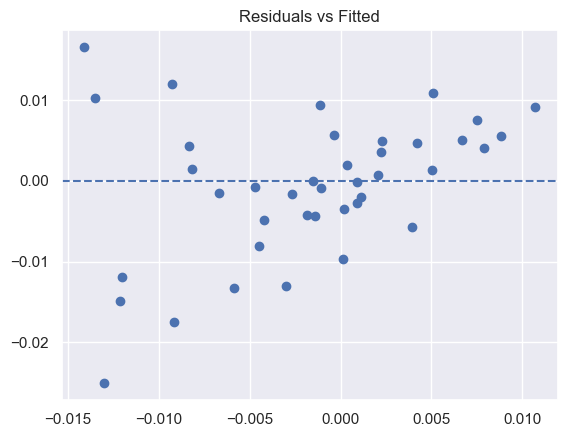

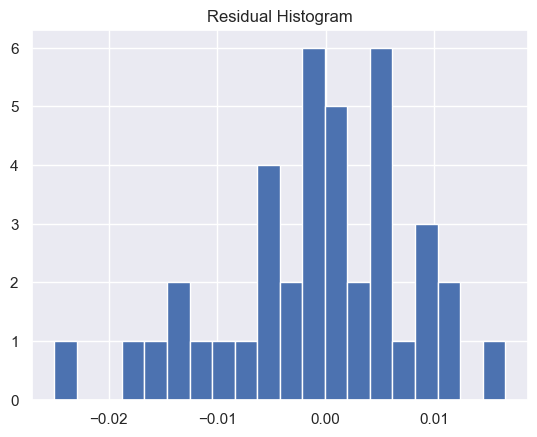

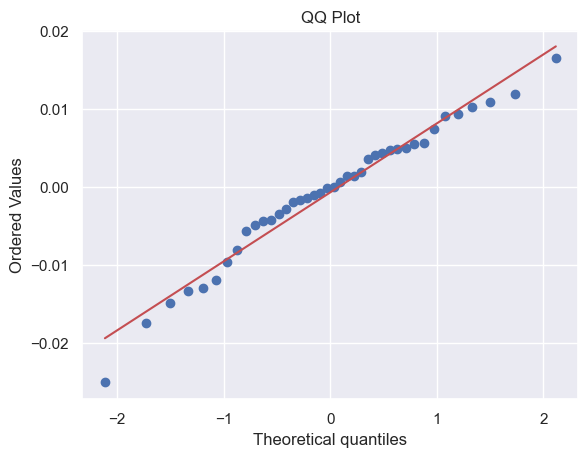

In [8]:
#visualize the residuals vs fitted for the OLS Model

resid = y_test - yhat_test
fitted = yhat_test
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); 
plt.savefig('residuals_vs_fitted_baseline.png')
plt.show()

plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); 
plt.savefig('residual_histogram_baseline.png')
plt.show()

plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); 
plt.savefig('qq_plot_baseline.png')
plt.show()

## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [9]:
#transformed feature from the starter code

df['momentum_sq'] = df['momentum']**2
X2 = df[['mkt_excess','size','value','momentum','momentum_sq']]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)

rmse_2  = mean_squared_error(y_test, y_pred2) ** 0.5
#rmse_2 = mean_squared_error(y_test, y_pred2, squared=False)

print(f'With x^2   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')

With x^2   R²=-0.0593  RMSE=0.012751


In [10]:

# Add transformed feature
X2 = X.copy()
X2['momentum_sq'] = X2['momentum']**2

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.20, random_state=42)

lin2 = LinearRegression()
lin2.fit(X2_train, y2_train)

y2hat_train = lin2.predict(X2_train)
y2hat_test  = lin2.predict(X2_test)

resid2_train = y2_train - y2hat_train

r2_train_2 = r2_score(y2_train, y2hat_train)
r2_test_2  = r2_score(y2_test, y2hat_test)

rmse_train_2 = mean_squared_error(y2_train, y2hat_train) ** 0.5
rmse_test_2  = mean_squared_error(y2_test, y2hat_test) ** 0.5

compare = pd.DataFrame({
    'Model': ['Baseline','With momentum^2'],
    'Train R2': [float('{:.5f}'.format(r2_train)), float('{:.5f}'.format(r2_train_2))],
    'Test R2': [float('{:.5f}'.format(r2_test)), float('{:.5f}'.format(r2_test_2))],
    'Train RMSE': [float('{:.6f}'.format(rmse_train)), float('{:.6f}'.format(rmse_train_2))],
    'Test RMSE': [float('{:.6f}'.format(rmse_test)), float('{:.6f}'.format(rmse_test_2))],
})
compare


,Model,Train R2,Test R2,Train RMSE,Test RMSE
0,Baseline,0.52056,0.51545,0.007684,0.008624
1,With momentum^2,0.52370,0.52838,0.007659,0.008508


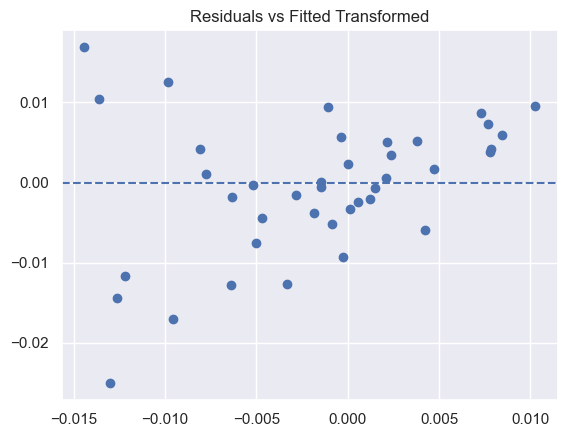

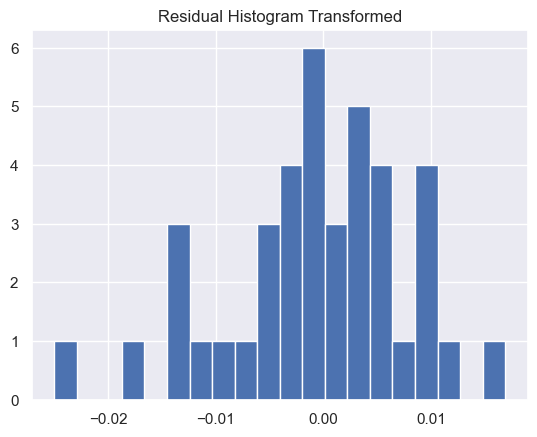

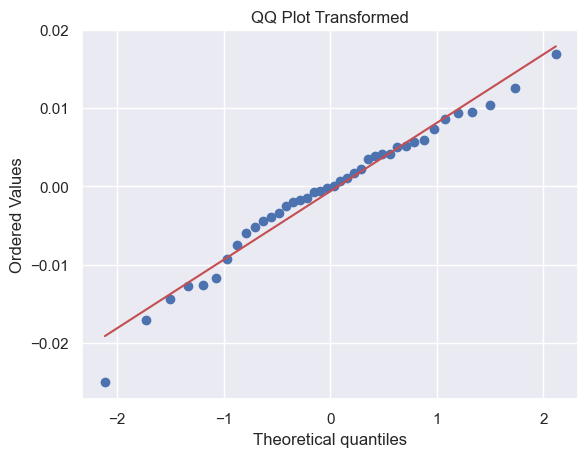

In [11]:
#visualize the transformed results

resid2 = y2_test - y2hat_test
fitted2 = y2hat_test
plt.figure(); plt.scatter(fitted2, resid2); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted Transformed'); 
plt.savefig('residuals_vs_fitted_transformed.png')
plt.show()

plt.figure(); plt.hist(resid2, bins=20); plt.title('Residual Histogram Transformed'); 
plt.savefig('residual_histogram_transformed.png')
plt.show()

plt.figure(); st.probplot(resid2, dist='norm', plot=plt); plt.title('QQ Plot Transformed'); 
plt.savefig('qq_plot_transformed.png')
plt.show()


## 4) Interpretation 

### Workflow
- Compare **R² / RMSE** on **test** between baseline and transformed models.  
- Prefer the model that **improves test metrics** and **shows cleaner residual diagnostics** (no strong curvature, roughly constant spread, near‑normal residuals, and no lag-1 pattern).  
- Because the true DGP includes `momentum²`, the **transformed model** should outperform and pass linearity checks better, while still being a **linear regression** (linear in coefficients).

### Conclusion

**Linearity:**  
1. Baseline Model: show a curved (U-shape) pattern, violating linearity because the true relationship includes a quadratic effect. 
2. Momentum Model: The curve disappears, and residuals look more randomly scattered. Linearity is much better satisfied.  

**Homoscedasticity:**  
1. Baseline: Residual spread is uneven (funneling)
2. Momentum: some heteroscedasticity remains (spread improved a little bit)

**Normality:**  
Both models: Residual histograms and QQ plots are roughly bell-shaped, with mild tail deviations. This is acceptable given n=200 and regression’s robustness.  

**Independence:**  
Both models: Residuals show no systematic lag-1 dependence, so independence holds.  

**Better Model**
Momentum model has higher R², lower RMSE on the test set, and fixes the linearity violation. Other assumptions (independence, normality) remain acceptable, and homoscedasticity improves.  

**Next Steps**
1. Polynomial Model
2. Address heteroscedasticity with **Weighted Least Squares (WLS)**
3. Investigate **influential points** (e.g., Cook’s distance).  
4. Explore **interactions** (e.g., `mkt_excess × size`) if theory supports them.  